## Triadic Closure

- The tendency for people who share connections in a social network to become connected

#### Clustering 
- #### Local clustering coefficient: 
Fraction of pairs of the node’s friends that are friends with each other.

In [16]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

In [27]:
list(G.nodes)

['A', 'K', 'B', 'C', 'E', 'F', 'D', 'H', 'G', 'I', 'J']

/home/chengyu/anaconda3/envs/network/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


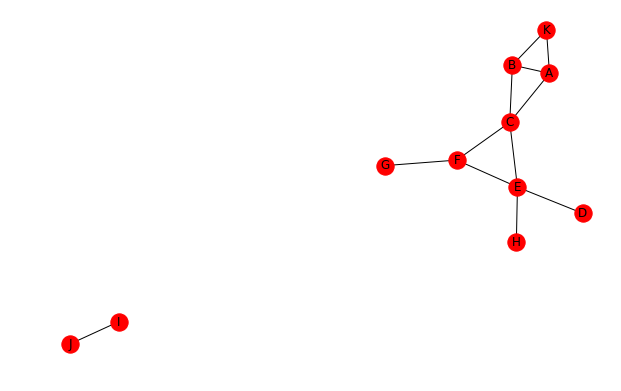

In [29]:
G = nx.Graph()
G.add_edges_from([('A', 'K'), ('A', 'B'), ('A', 'C'), ('B', 'C'), ('B', 'K'),
('C', 'E'), ('C', 'F'), ('D', 'E'), ('E', 'F'), ('E', 'H'), ('F', 'G'), ('I', 'J')])
layout = nx.spring_layout(G)
plt.figure(1, figsize=(8,5))
nx.draw(G,pos=layout,nodelist=list(G.nodes),with_labels = True)

- ##### Local clustering for one node

In [31]:
print(nx.clustering(G,'F'))  ## local clustering for one node
print(nx.clustering(G,'J'))
print(nx.clustering(G,'A'))

0.3333333333333333
0
0.6666666666666666


##### Global clustering coefficient
- Average local clustering coefficient over all nodes in the graph

In [33]:
nx.average_clustering(G)  ## average all local clustering coefficient

0.28787878787878785

##### Global Clustering Coefficient:  Transitivity
- Percentage of “open triads” that are triangles in a network.

In [35]:
nx.transitivity(G) ## 3∗Number of closed triads/Number of open triads

0.4090909090909091

## Distance
- How “far” is node A from node H?
- Path: A sequence of nodes connected by an edge.

In [41]:
## 
print('Show shortest path: {}'.format(nx.shortest_path(G,'B','E')))  ## show path 
print('Show shortest path length: {}'.format(nx.shortest_path_length(G,'B','E'))) 

Show shortest path: ['B', 'C', 'E']
Show shortest path length: 2


- Find the distance from node A to every other node  -  User Breadth-First Search

In [43]:
## to get the tree 
T = nx.bfs_tree(G,'A')
T.edges()

OutEdgeView([('A', 'K'), ('A', 'B'), ('A', 'C'), ('C', 'E'), ('C', 'F'), ('E', 'D'), ('E', 'H'), ('F', 'G')])

In [44]:
## get the actually distance fron A to everywhere
nx.shortest_path_length(G,'A') ## can not reach to I and J

{'A': 0, 'K': 1, 'B': 1, 'C': 1, 'E': 2, 'F': 2, 'D': 3, 'H': 3, 'G': 3}

- Average distance between every pair of nodes

/home/chengyu/anaconda3/envs/network/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


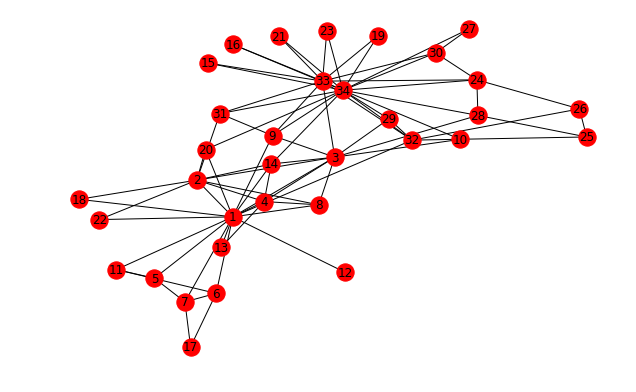

In [67]:
## switch to use a connected graph
G = nx.karate_club_graph()
G=nx.convert_node_labels_to_integers(G,first_label=1)
nx.draw(G,with_labels = True)

In [64]:
nx.average_shortest_path_length(G)

2.408199643493761

- Diameter: maximum distance between any pair of nodes.

In [52]:
nx.diameter(G) ## max distance for any pair of nodes

5

- The Eccentricity of a node n is the largest distance between n and all other nodes.

In [58]:
print(nx.eccentricity(G)) ## get the largest possible path between nodes 

{0: 3, 1: 3, 2: 3, 3: 3, 4: 4, 5: 4, 6: 4, 7: 4, 8: 3, 9: 4, 10: 4, 11: 4, 12: 4, 13: 3, 14: 5, 15: 5, 16: 5, 17: 4, 18: 5, 19: 3, 20: 5, 21: 4, 22: 5, 23: 5, 24: 4, 25: 4, 26: 5, 27: 4, 28: 4, 29: 5, 30: 4, 31: 3, 32: 4, 33: 4}


- The <b>radius</b> of a graph is the minimum eccentricity.

In [57]:
nx.radius(G)

3

- The <b>Periphery</b> of a graph is the set of nodes that have eccentricity equal to the diameter.

In [60]:
nx.periphery(G)  ## nodes that are far awasy from the center

[14, 15, 16, 18, 20, 22, 23, 26, 29]

- The <b>center</b> of a graph is the set of nodes that have eccentricity equal to the radius.

In [62]:
nx.center(G)

[0, 1, 2, 3, 8, 13, 19, 31]

<b>Center and periphery are sensitive to outliers, not as robost one node is very far away will have a huge impact of those statistics</b>

### Connect Graphs and communities
A subset of nodes such as:
- Every node in the subset has a path to every other node.
- No other node has a path to any node in the subset.

In [74]:
print(nx.number_connected_components(G))  ## number of fully connect graphs 

1


In [75]:
print(sorted(nx.connected_components(G))) ## nodes in each connect graphs

[{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34}]


In [76]:
print(nx.node_connected_component(G, 1)) ## nodes of connected graph where specific node is in 

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34}


#### For directed graph, we have strongly connected and weekely connected

In [81]:
if G.is_directed():
    nx.is_strongly_connected(G)
    nx.is_weakly_connected(G)
    sorted(nx.strongly_connected_components(G))
    sorted(nx.weakly_connected_components(G))

### Network Robustness
- <b>Network robustness</b>: the ability of a network to maintain its general structural properties when it faces failures or attacks.

In [82]:
#What is the smallest number of nodes that
#can be removed from this graph in order to
#disconnect it?
nx.node_connectivity(G)

1

In [83]:
nx.minimum_node_cut(G)

{1}

In [85]:
#What is the smallest number of edges that
#can be removed from this graph in order to
#disconnect it?
nx.edge_connectivity(G)

1

In [86]:
nx.minimum_edge_cut(G)

{(12, 1)}

In [89]:
## list all possible way to go from 1 to 13
len(sorted(nx.all_simple_paths(G, 1, 13)))

124488

In [108]:
#If we wanted to block the message from G to L by
#removing nodes from the network, how many
#nodes would we need to remove?

nx.node_connectivity(G, 1, 14)

5

In [111]:
#Which nodes?
nx.minimum_node_cut(G,1,34)  ## if two nodes are connected, it will return empty list

{3, 9, 14, 20, 31, 32}

In [103]:
nx.edge_connectivity(G, 1, 13)

2

In [104]:
nx.minimum_edge_cut(G, 1, 13)

{(1, 13), (4, 13)}